In [4]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

def load_images_from_folder(folder_path, image_size=(128, 128)):
    images, labels = [], []
    for root, subdirs, files in os.walk(folder_path):
        for filename in files:
            img_path = os.path.join(root, filename)
            label = os.path.basename(root)  # Use the last folder name as the label
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, image_size)
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

# Load images and labels
folder_path = './Dataset'  # Path to main dataset folder
images, labels = load_images_from_folder(folder_path)

# Check if dataset is loaded successfully
print("Number of images loaded:", len(images))
print("Number of labels loaded:", len(labels))

# Check if images and labels match
if len(images) == len(labels):
    print("Images and labels are correctly paired.")
else:
    print("Mismatch between images and labels!")

# Print the shape of the image array to confirm size and format
if len(images) > 0:
    print("Shape of images array:", images.shape)
    print("Sample label:", labels[0])
    print("Sample image array (first image):\n", images[0])

# Check unique classes in labels
unique_labels = np.unique(labels)
print("Unique labels in the dataset:", unique_labels)


Number of images loaded: 3775
Number of labels loaded: 3775
Images and labels are correctly paired.
Shape of images array: (3775, 128, 128, 3)
Sample label: Basalt
Sample image array (first image):
 [[[113 118 122]
  [116 121 124]
  [117 122 125]
  ...
  [142 147 146]
  [141 146 145]
  [138 144 142]]

 [[116 121 124]
  [118 123 126]
  [120 125 128]
  ...
  [145 150 149]
  [144 149 148]
  [141 146 146]]

 [[119 124 127]
  [121 126 129]
  [123 128 131]
  ...
  [149 154 153]
  [147 152 151]
  [145 150 149]]

 ...

 [[234 234 234]
  [234 234 234]
  [234 234 234]
  ...
  [228 228 228]
  [229 229 229]
  [231 231 231]]

 [[234 234 234]
  [234 234 234]
  [235 235 235]
  ...
  [232 232 232]
  [232 232 232]
  [230 230 230]]

 [[234 234 234]
  [234 234 234]
  [235 235 235]
  ...
  [232 232 232]
  [232 232 232]
  [228 228 228]]]
Unique labels in the dataset: ['Basalt' 'Coal' 'Granite' 'Limestone' 'Marble' 'Quartzite' 'Sandstone'
 'mineralOres']


In [5]:
from sklearn.preprocessing import LabelEncoder

# Encode the labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)
X_train, X_val = X_train / 255.0, X_val / 255.0  # Normalize images



In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(len(label_encoder.classes_), activation='softmax')
    ])
    return model

model = create_model((128, 128, 3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2,
                             height_shift_range=0.2, horizontal_flip=True)
datagen.fit(X_train)

model.fit(datagen.flow(X_train, y_train, batch_size=32), validation_data=(X_val, y_val), epochs=20)

model.save("mineral_classification_model.keras")
np.save("label_encoder_classes.npy", label_encoder.classes_)


C:\Users\okays\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


C:\Users\okays\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


95/95 ━━━━━━━━━━━━━━━━━━━━ 30s 282ms/step - accuracy: 0.4405 - loss: 1.8092 - val_accuracy: 0.5020 - val_loss: 1.3466
Epoch 2/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 25s 253ms/step - accuracy: 0.5616 - loss: 1.3017 - val_accuracy: 0.6371 - val_loss: 1.0654
Epoch 3/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 25s 252ms/step - accuracy: 0.6210 - loss: 1.1236 - val_accuracy: 0.6490 - val_loss: 0.9853
Epoch 4/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 25s 257ms/step - accuracy: 0.6404 - loss: 1.0667 - val_accuracy: 0.6861 - val_loss: 0.9078
Epoch 5/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 25s 253ms/step - accuracy: 0.6721 - loss: 0.9913 - val_accuracy: 0.6517 - val_loss: 0.9789
Epoch 6/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 25s 256ms/step - accuracy: 0.6901 - loss: 0.9385 - val_accuracy: 0.6874 - val_loss: 0.8952
Epoch 7/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 28s 283ms/step - accuracy: 0.6793 - loss: 0.9094 - val_accuracy: 0.7099 - val_loss: 0.8557
Epoch 8/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 27s 282ms/step - accuracy: 0.6782 - loss: 0.9051 - val_accuracy: 0.678

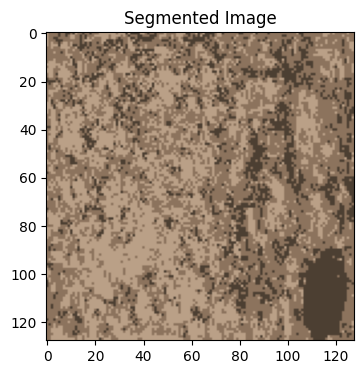

In [48]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def color_clustering(image_path, n_clusters=3):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128, 128))

    # Reshape the image for clustering
    pixel_values = img.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    # Apply KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(pixel_values)

    # Get cluster centers and labels
    centers = np.uint8(kmeans.cluster_centers_)
    labels = kmeans.labels_

    # Calculate area percentages for each cluster
    _, counts = np.unique(labels, return_counts=True)
    percentages = counts / len(labels)

    # Reconstruct segmented image
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(img.shape)

    return centers, percentages, segmented_image

# Visualize segmentation
image_path = './IMG-20241025-WA0040.jpg'
centers, percentages, segmented_image = color_clustering(image_path)

plt.figure(figsize=(8, 4))
plt.imshow(segmented_image)
plt.axis('on')
plt.title('Segmented Image')
plt.show()


In [13]:
from tensorflow.keras.models import load_model

# Load the model and label encoder
model = load_model("mineral_classification_model.keras")
label_classes = np.load("label_encoder_classes.npy", allow_pickle=True)
label_encoder.classes_ = label_classes

def classify_cluster_color(cluster_color, model, label_encoder):
    # Create an image filled with the cluster color
    img = np.full((128, 128, 3), cluster_color, dtype=np.uint8)
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)
    
    # Predict mineral type
    prediction = model.predict(img)
    predicted_label = np.argmax(prediction)
    return label_encoder.inverse_transform([predicted_label])[0]


In [14]:
mineral_predictions = [classify_cluster_color(color, model, label_encoder) for color in centers]

# Print the results
for i, mineral in enumerate(mineral_predictions):
    print(f"Cluster {i+1} (Color: {centers[i]}): {mineral} ({percentages[i] * 100:.2f}% of area)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Cluster 1 (Color: [190 191 189]): mineralOres (50.88% of area)
Cluster 2 (Color: [72 69 62]): Marble (22.08% of area)
Cluster 3 (Color: [136 133 123]): Marble (27.04% of area)


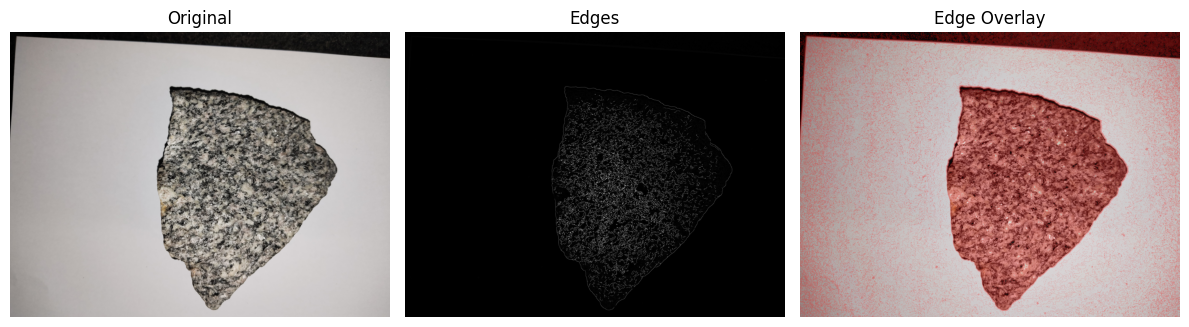

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_rock_edges(image_path):
    """
    Detect edges in rock image and plot results
    """
    # Read image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Could not load image")
    
    # Convert to RGB for display
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Convert to grayscale for processing
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Enhance image
    # Apply bilateral filter to reduce noise while preserving edges
    denoised = cv2.bilateralFilter(gray, d=9, sigmaColor=75, sigmaSpace=75)
    
    # Enhance contrast using CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    enhanced = clahe.apply(denoised)
    
    # Detect edges using multiple methods
    # 1. Canny Edge Detection with automatic threshold detection
    sigma = 0.33
    median = np.median(enhanced)
    lower = int(max(0, (1.0 - sigma) * median))
    upper = int(min(255, (1.0 + sigma) * median))
    edges_canny = cv2.Canny(enhanced, lower, upper)
    
    # 2. Sobel Edge Detection
    sobelx = cv2.Sobel(enhanced, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(enhanced, cv2.CV_64F, 0, 1, ksize=3)
    edges_sobel = np.sqrt(sobelx**2 + sobely**2)
    edges_sobel = np.uint8(edges_sobel / edges_sobel.max() * 255)
    
    # Combine edges
    edges = cv2.addWeighted(edges_canny, 0.7, edges_sobel, 0.3, 0)
    
    # Clean up edges
    kernel = np.ones((3,3), np.uint8)
    edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
    
    # Create overlay
    overlay = image_rgb.copy()
    overlay[edges > 0] = [255, 0, 0]  # Red color for edges
    
    # Blend with original image
    result = cv2.addWeighted(image_rgb, 0.7, overlay, 0.3, 0)
    
    # Plot results in a single figure
    plt.figure(figsize=(12, 4))
    
    plt.subplot(131)
    plt.imshow(image_rgb)
    plt.title('Original')
    plt.axis('off')
    
    plt.subplot(132)
    plt.imshow(edges, cmap='gray')
    plt.title('Edges')
    plt.axis('off')
    
    plt.subplot(133)
    plt.imshow(result)
    plt.title('Edge Overlay')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return edges, result

# Example usage
if __name__ == "__main__":
    image_path = "mineralOres/IMG-20241025-WA0046.jpg"
    try:
        edges, result = detect_rock_edges(image_path)
        # Optional: save results
        cv2.imwrite('rock_edges.png', edges)
        cv2.imwrite('rock_edges_overlay.png', cv2.cvtColor(result, cv2.COLOR_RGB2BGR))
    except Exception as e:
        print(f"Error processing image: {str(e)}")


Detected 8 distinct colors in the image:
dark Purple (RGB(112, 41, 99)): 35.6%
Gray (RGB(128, 128, 128)): 23.1%
Silver (RGB(192, 192, 192)): 12.4%
Black (RGB(0, 0, 0)): 11.0%
Light Blue (RGB(173, 216, 230)): 7.5%
azure (RGB(240, 255, 255)): 5.0%
Pink (RGB(255, 182, 193)): 4.9%
Orange (RGB(255, 165, 0)): 0.4%


C:\Users\okays\AppData\Local\Temp\ipykernel_1516\2014045345.py:400: RuntimeWarning: invalid value encountered in sqrt
  edges_sobel = np.sqrt(sobelx*2 + sobely*2)
C:\Users\okays\AppData\Local\Temp\ipykernel_1516\2014045345.py:401: RuntimeWarning: invalid value encountered in cast
  edges_sobel = np.uint8(edges_sobel / edges_sobel.max() * 255)


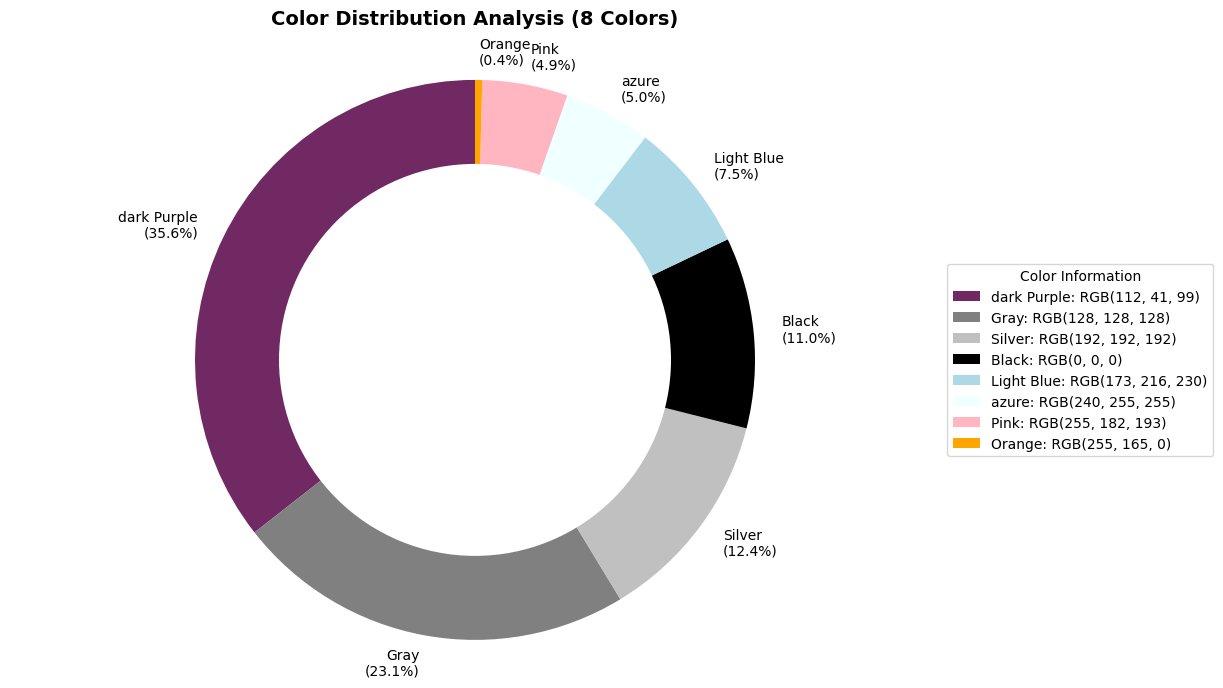

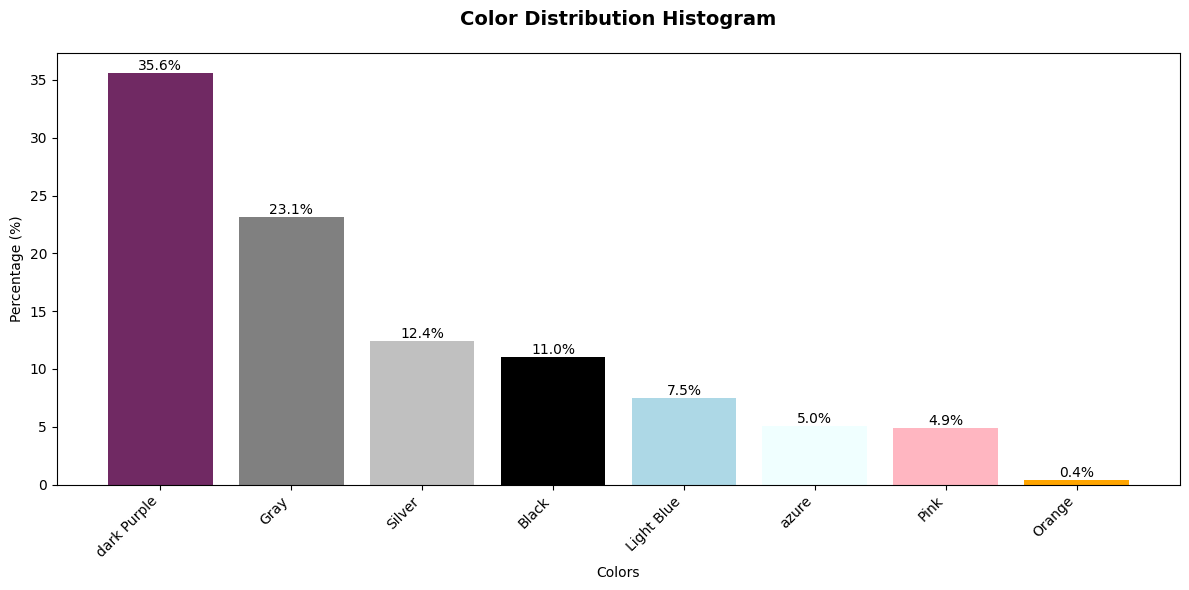

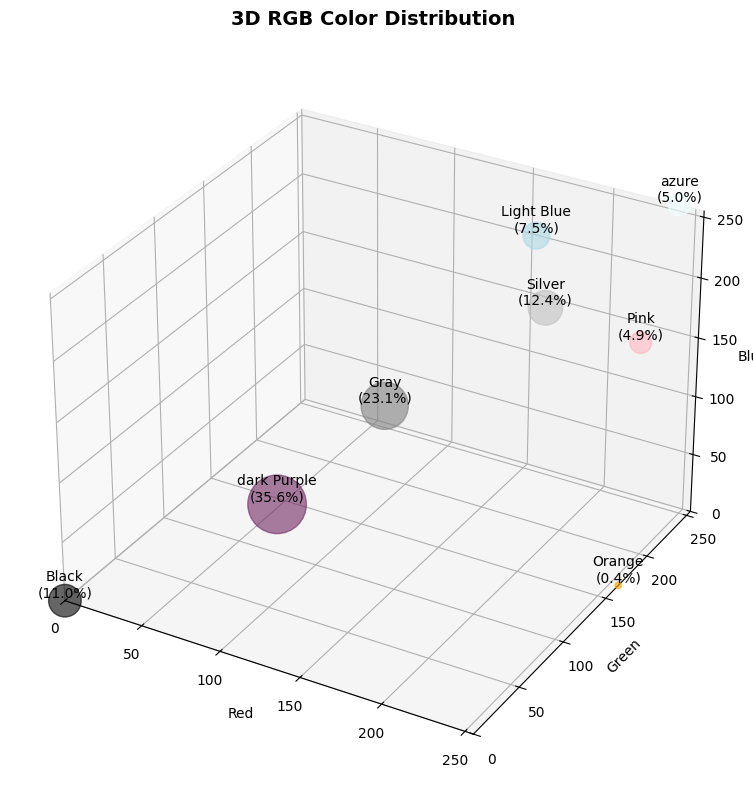

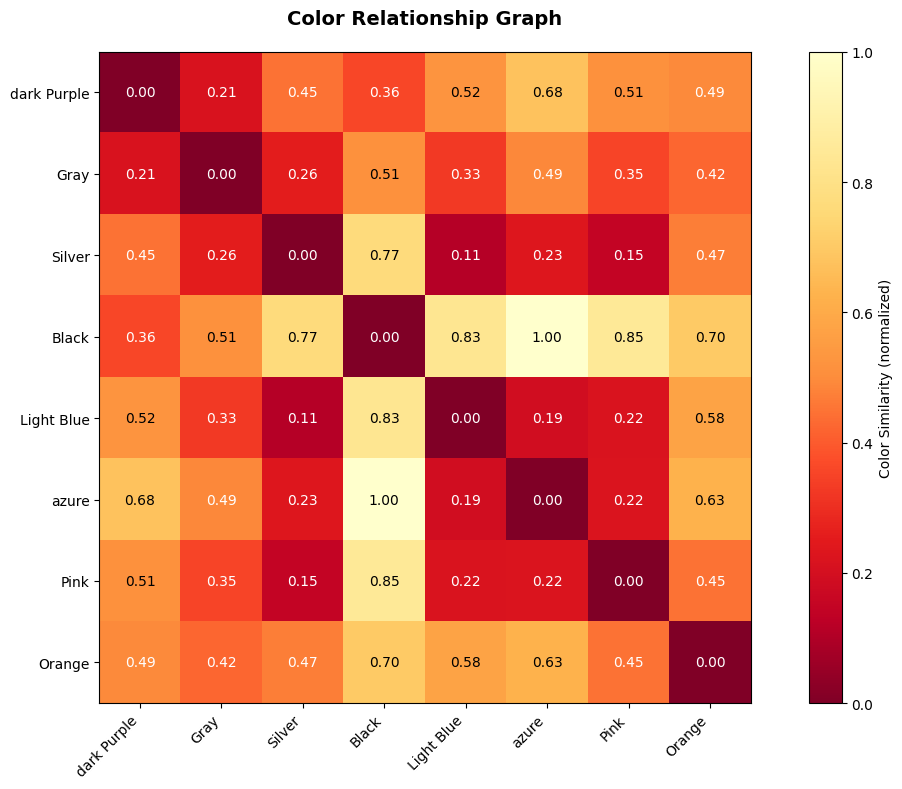

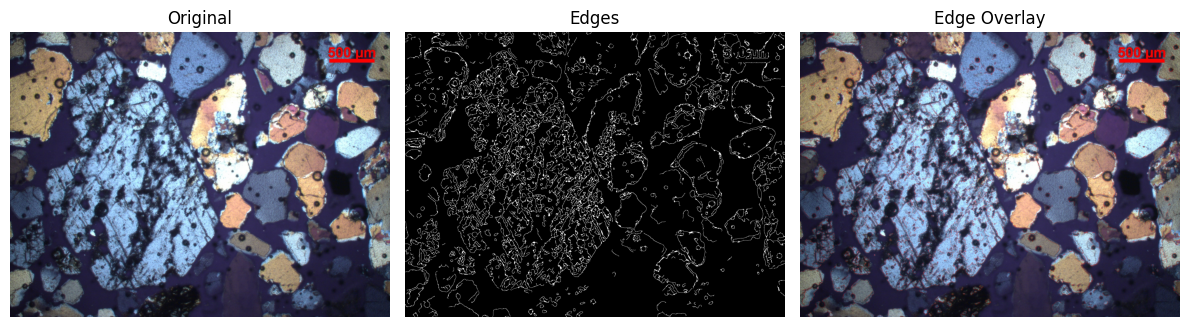

In [14]:
from reportlab.lib import colors
from reportlab.lib.pagesizes import letter, A4
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.units import inch
from io import BytesIO
import os
from datetime import datetime
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
from collections import defaultdict
import matplotlib.pyplot as plt
from reportlab.lib import colors
from reportlab.lib.pagesizes import letter, A4
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.units import inch
from io import BytesIO
from datetime import datetime

from reportlab.lib import colors
from reportlab.lib.pagesizes import letter, A4
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.units import inch
from io import BytesIO
import matplotlib.pyplot as plt
import os
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.spatial import distance
from collections import defaultdict

def load_and_preprocess(image_path):
    """
    Load and preprocess the image for better color detection
    """
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Could not load image")
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Apply bilateral filter to reduce noise while preserving edges
    denoised = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)
    
    # Apply contrast enhancement
    lab = cv2.cvtColor(denoised, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    l = clahe.apply(l)
    enhanced = cv2.merge((l,a,b))
    enhanced = cv2.cvtColor(enhanced, cv2.COLOR_LAB2RGB)
    
    return enhanced

def get_color_name_and_rgb(rgb):
    """
    Get color name and its true RGB value
    """
    color_map = {
        'Red': (255, 0, 0),
        'Green': (0, 255, 0),
        'Blue': (0, 0, 255),
        'Yellow': (255, 255, 0),
        'Cyan': (0, 255, 255),
        'Magenta': (255, 0, 255),
        'White': (255, 255, 255),
        'Black': (0, 0, 0),
        'Gray': (128, 128, 128),
        'Orange': (255, 165, 0),
        'Purple': (128, 0, 128),
        'Brown': (139, 69, 19),
        'Pink': (255, 182, 193),
        'Beige': (245, 245, 220),
        'Navy': (0, 0, 128),
        'Gold': (255, 215, 0),
        'Silver': (192, 192, 192),
        'Maroon': (128, 0, 0),
        'Olive': (128, 128, 0),
        'Teal': (0, 128, 128),
        'Light Blue': (173, 216, 230),
        'Dark Green': (0, 100, 0),
        'Dark Red': (139, 0, 0),
        'Light Gray': (211, 211, 211),
        'dark Purple': (112, 41, 99),
        'azure': (240, 255, 255)
    }
    
    min_dist = float('inf')
    closest_color_name = None
    closest_color_rgb = None
    
    for color_name, color_rgb in color_map.items():
        dist = distance.euclidean(rgb, color_rgb)
        if dist < min_dist:
            min_dist = dist
            closest_color_name = color_name
            closest_color_rgb = color_rgb
    
    return closest_color_name, closest_color_rgb

def determine_optimal_clusters(pixels_scaled, max_clusters=15):
    """
    Determine the optimal number of color clusters using elbow method
    """
    inertias = []
    K = range(1, max_clusters + 1)
    
    for k in K:
        kmeans = KMeans(n_clusters=k, n_init=10)
        kmeans.fit(pixels_scaled)
        inertias.append(kmeans.inertia_)
    
    # Calculate the rate of change
    differences = np.diff(inertias)
    rates_of_change = np.diff(differences)
    
    # Find the elbow point
    elbow_point = np.argmin(np.abs(rates_of_change)) + 2
    
    return min(elbow_point + 1, max_clusters)

def merge_similar_colors(colors, proportions, color_names):
    """
    Merge similar colors and sum their proportions
    """
    merged_colors = defaultdict(float)
    color_to_rgb = {}
    
    # Sum proportions for identical colors
    for color, prop, name in zip(colors, proportions, color_names):
        color_tuple = tuple(map(int, color))
        merged_colors[name] += prop
        color_to_rgb[name] = color_tuple
    
    # Convert back to lists
    merged_names = list(merged_colors.keys())
    merged_proportions = list(merged_colors.values())
    merged_rgb = [color_to_rgb[name] for name in merged_names]
    
    # Sort by proportion
    sorted_indices = np.argsort(merged_proportions)[::-1]
    
    return (np.array(merged_rgb)[sorted_indices], 
            np.array(merged_proportions)[sorted_indices], 
            np.array(merged_names)[sorted_indices])

def get_dynamic_colors(image):
    """
    Get precise color distribution using dynamic number of clusters
    """
    # Reshape the image
    pixels = image.reshape(-1, 3)
    
    # Sample pixels for faster processing
    samples = min(50000, len(pixels))
    pixels_sample = pixels[np.random.choice(len(pixels), samples, replace=False)]
    
    # Scale features
    scaler = StandardScaler()
    pixels_scaled = scaler.fit_transform(pixels_sample)
    
    # Determine optimal number of clusters
    n_colors = determine_optimal_clusters(pixels_scaled)
    
    # Apply K-means clustering with optimal clusters
    kmeans = KMeans(n_clusters=n_colors, n_init=10)
    kmeans_labels = kmeans.fit_predict(pixels_scaled)
    
    # Get cluster centers and convert back to original scale
    centers = scaler.inverse_transform(kmeans.cluster_centers_)
    centers = np.clip(centers, 0, 255)
    
    # Calculate proportions
    proportions = np.bincount(kmeans_labels) / len(kmeans_labels)
    
    # Sort colors by proportion
    sorted_indices = np.argsort(proportions)[::-1]
    sorted_colors = centers[sorted_indices]
    sorted_proportions = proportions[sorted_indices]
    
    # Map to nearest named colors
    named_colors = []
    true_rgb_values = []
    for color in sorted_colors:
        name, rgb = get_color_name_and_rgb(color)
        named_colors.append(name)
        true_rgb_values.append(rgb)
    
    # Merge similar colors
    return merge_similar_colors(true_rgb_values, sorted_proportions, named_colors)

def create_enhanced_pie_chart(colors, percentages, color_names):
    """
    Create an enhanced pie chart with correct color representation
    """
    plt.figure(figsize=(12, 8))
    
    # Prepare colors for plotting (normalize to 0-1 range)
    plot_colors = [np.array(color)/255 for color in colors]
    
    # Create custom labels
    labels = [f'{name}\n({percentages[i]:.1f}%)' 
             for i, name in enumerate(color_names)]
    
    # Create pie chart
    patches, texts, autotexts = plt.pie(
        percentages,
        labels=labels,
        colors=plot_colors,
        autopct='',  # We already included percentages in labels
        pctdistance=0.85,
        startangle=90,
        labeldistance=1.1
    )
    
    # Enhance text properties
    plt.setp(texts, size=10)
    
    # Add title
    plt.title(f'Color Distribution Analysis ({len(colors)} Colors)', 
             pad=20, size=14, weight='bold')
    
    # Add a white circle at the center for donut effect
    center_circle = plt.Circle((0,0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)
    
    # Add legend
    legend_labels = [f'{name}: RGB{tuple(map(int, color))}' 
                    for name, color in zip(color_names, colors)]
    plt.legend(patches, legend_labels,
              title="Color Information",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))
    
    plt.axis('equal')
    return plt.gcf()

def create_color_histogram(colors, percentages, color_names):
    """
    Create a histogram of color distribution
    """
    plt.figure(figsize=(12, 6))
    
    # Prepare colors for plotting (normalize to 0-1 range)
    plot_colors = [np.array(color)/255 for color in colors]
    
    # Create bars
    bars = plt.bar(range(len(colors)), percentages, color=plot_colors)
    
    # Customize the plot
    plt.title('Color Distribution Histogram', pad=20, size=14, weight='bold')
    plt.xlabel('Colors')
    plt.ylabel('Percentage (%)')
    
    # Rotate x-axis labels for better readability
    plt.xticks(range(len(colors)), color_names, rotation=45, ha='right')
    
    # Add percentage labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom')
    
    plt.tight_layout()
    return plt.gcf()

def create_3d_scatter(colors, percentages, color_names):
    """
    Create a 3D scatter plot showing RGB color distribution
    """
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Normalize colors to 0-1 range for plotting
    plot_colors = [np.array(color)/255 for color in colors]
    
    # Extract RGB values
    r = [color[0] for color in colors]
    g = [color[1] for color in colors]
    b = [color[2] for color in colors]
    
    # Create scatter plot with size proportional to percentage
    sizes = percentages * 50  # Scale factor for better visibility
    scatter = ax.scatter(r, g, b, c=plot_colors, s=sizes, alpha=0.6)
    
    # Add labels
    for i in range(len(colors)):
        ax.text(r[i], g[i], b[i], f'{color_names[i]}\n({percentages[i]:.1f}%)',
                horizontalalignment='center', verticalalignment='bottom')
    
    # Set labels and title
    ax.set_xlabel('Red')
    ax.set_ylabel('Green')
    ax.set_zlabel('Blue')
    ax.set_title('3D RGB Color Distribution', pad=20, size=14, weight='bold')
    
    # Set axis limits
    ax.set_xlim(0, 255)
    ax.set_ylim(0, 255)
    ax.set_zlim(0, 255)
    
    plt.tight_layout()
    return plt.gcf()

def create_color_relationship_graph(colors, percentages, color_names):
    """
    Create a graph showing relationships between colors based on RGB distance
    """
    plt.figure(figsize=(12, 8))
    
    # Calculate distances between colors
    n_colors = len(colors)
    distances = np.zeros((n_colors, n_colors))
    
    for i in range(n_colors):
        for j in range(n_colors):
            distances[i,j] = np.sqrt(np.sum((np.array(colors[i]) - np.array(colors[j]))**2))
    
    # Normalize distances for plotting
    distances = distances / distances.max()
    
    # Create a relationship graph
    plt.imshow(distances, cmap='YlOrRd_r')
    plt.colorbar(label='Color Similarity (normalized)')
    
    # Add labels
    plt.xticks(range(n_colors), color_names, rotation=45, ha='right')
    plt.yticks(range(n_colors), color_names)
    
    # Add title
    plt.title('Color Relationship Graph', pad=20, size=14, weight='bold')
    
    # Add percentage annotations
    for i in range(n_colors):
        for j in range(n_colors):
            plt.text(j, i, f'{distances[i,j]:.2f}',
                    ha='center', va='center',
                    color='black' if distances[i,j] > 0.5 else 'white')
    
    plt.tight_layout()
    return plt.gcf()

def save_plot_to_bytes(fig):
    """
    Convert matplotlib figure to bytes for PDF inclusion
    """
    buf = BytesIO()
    fig.savefig(buf, format='png', bbox_inches='tight', dpi=300)
    buf.seek(0)
    return buf.getvalue()

def detect_rock_edges(image_path):
    """
    Detect edges in rock image and return visualization figures
    """
    # Read image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Could not load image")
    
    # Convert to RGB for display
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Convert to grayscale for processing
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Enhance image
    denoised = cv2.bilateralFilter(gray, d=9, sigmaColor=75, sigmaSpace=75)
    
    # Enhance contrast using CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    enhanced = clahe.apply(denoised)
    
    # Detect edges using multiple methods
    sigma = 0.33
    median = np.median(enhanced)
    lower = int(max(0, (1.0 - sigma) * median))
    upper = int(min(255, (1.0 + sigma) * median))
    edges_canny = cv2.Canny(enhanced, lower, upper)
    
    # Sobel Edge Detection
    sobelx = cv2.Sobel(enhanced, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(enhanced, cv2.CV_64F, 0, 1, ksize=3)
    edges_sobel = np.sqrt(sobelx*2 + sobely*2)
    edges_sobel = np.uint8(edges_sobel / edges_sobel.max() * 255)
    
    # Combine edges
    edges = cv2.addWeighted(edges_canny, 0.7, edges_sobel, 0.3, 0)
    
    # Clean up edges
    kernel = np.ones((3,3), np.uint8)
    edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
    
    # Create overlay
    overlay = image_rgb.copy()
    overlay[edges > 0] = [255, 0, 0]  # Red color for edges
    
    # Blend with original image
    result = cv2.addWeighted(image_rgb, 0.7, overlay, 0.3, 0)
    
    # Create visualization figure
    fig = plt.figure(figsize=(12, 4))
    
    plt.subplot(131)
    plt.imshow(image_rgb)
    plt.title('Original')
    plt.axis('off')
    
    plt.subplot(132)
    plt.imshow(edges, cmap='gray')
    plt.title('Edges')
    plt.axis('off')
    
    plt.subplot(133)
    plt.imshow(result)
    plt.title('Edge Overlay')
    plt.axis('off')
    
    plt.tight_layout()
    
    return edges, result, fig

def create_enhanced_pdf_report(image_path, colors, percentages, color_names, color_figs, edges, result, edge_fig):
    """
    Create an enhanced PDF report containing both color analysis and edge detection results
    """
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    pdf_filename = f"rock_analysis_report_{timestamp}.pdf"
    
    doc = SimpleDocTemplate(
        pdf_filename,
        pagesize=A4,
        rightMargin=72,
        leftMargin=72,
        topMargin=55,
        bottomMargin=55
    )
    
    styles = getSampleStyleSheet()
    title_style = styles['Heading1']
    heading_style = styles['Heading2']
    normal_style = styles['Normal']
    
    color_style = ParagraphStyle(
        'ColorStyle',
        parent=styles['Normal'],
        spaceAfter=12,
        spaceBefore=12,
        leading=16
    )
    
    content = []
    
    # Add title and timestamp
    content.append(Paragraph("Rock Analysis Report", title_style))
    content.append(Spacer(1, 20))
    content.append(Paragraph(f"Generated on: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}", normal_style))
    content.append(Spacer(1, 20))
    
    # Add original image
    content.append(Paragraph("Original Image", heading_style))
    content.append(Spacer(1, 10))
    orig_img = Image(image_path)
    orig_img.drawWidth = 400
    orig_img.drawHeight = 300
    content.append(orig_img)
    content.append(Spacer(1, 20))
    
    # Add edge detection results
    content.append(Paragraph("Edge Detection Analysis", heading_style))
    content.append(Spacer(1, 10))
    
    # Convert edge detection figure to image
    edge_img_data = save_plot_to_bytes(edge_fig)
    edge_img = Image(BytesIO(edge_img_data))
    edge_img.drawWidth = 450
    edge_img.drawHeight = 150
    content.append(edge_img)
    content.append(Spacer(1, 20))
    
    # Add color analysis summary
    content.append(Paragraph("Color Analysis Summary", heading_style))
    content.append(Spacer(1, 10))
    
    color_info = [f"{name} (RGB{tuple(map(int, color))}): {percentage:.1f}%" 
                 for name, color, percentage in zip(color_names, colors, percentages)]
    for info in color_info:
        content.append(Paragraph(info, color_style))
    
    content.append(Spacer(1, 20))
    
    # Add color visualizations
    content.append(Paragraph("Color Analysis Visualizations", heading_style))
    content.append(Spacer(1, 10))
    
    viz_titles = [
        "Color Distribution (Donut Chart)",
        "Color Distribution Histogram",
        "3D RGB Color Distribution",
        "Color Relationship Graph"
    ]
    
    for title, fig in zip(viz_titles, color_figs.values()):
        content.append(Paragraph(title, heading_style))
        content.append(Spacer(1, 10))
        img_data = save_plot_to_bytes(fig)
        img = Image(BytesIO(img_data))
        img.drawWidth = 450
        img.drawHeight = 350
        content.append(img)
        content.append(Spacer(1, 20))
    
    # Build PDF
    try:
        doc.build(content)
        print(f"\nEnhanced PDF report has been generated successfully: {pdf_filename}")
    except Exception as e:
        print(f"\nError generating PDF report: {str(e)}")

def analyze_rock_image(image_path):
    """
    Comprehensive rock image analysis combining color and edge detection
    """
    # Perform color analysis
    colors, percentages, color_names = get_dynamic_colors(load_and_preprocess(image_path))
    percentages = percentages * 100
    
    # Print color information
    print(f"\nDetected {len(colors)} distinct colors in the image:")
    for name, color, percentage in zip(color_names, colors, percentages):
        print(f"{name} (RGB{tuple(map(int, color))}): {percentage:.1f}%")
    
    # Create color visualizations
    color_figs = {}
    color_figs['donut'] = create_enhanced_pie_chart(colors, percentages, color_names)
    color_figs['histogram'] = create_color_histogram(colors, percentages, color_names)
    color_figs['scatter'] = create_3d_scatter(colors, percentages, color_names)
    color_figs['relationship'] = create_color_relationship_graph(colors, percentages, color_names)
    
    # Perform edge detection
    edges, result, edge_fig = detect_rock_edges(image_path)
    
    # Display all visualizations
    plt.show()
    
    # Generate enhanced PDF report
    response = input("\nWould you like to generate a PDF report? (yes/no): ").lower()
    if response == 'yes':
        create_enhanced_pdf_report(image_path, colors, percentages, color_names, 
                                 color_figs, edges, result, edge_fig)
    
    return colors, percentages, color_names, edges, result

if __name__ == "__main__":
    image_path = "./WhatsApp Image 2024-10-27 at 13.05.00_f32ad1fd.jpg"
    try:
        colors, percentages, names, edges, result = analyze_rock_image(image_path)
    except Exception as e:
        print(f"Error processing image: {str(e)}")
        
        